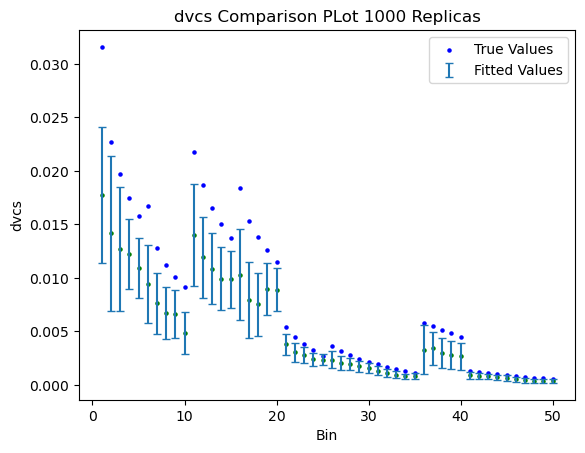

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Name of column that you want plotted
column_y = 'dvcs'

folder_path = 'C:\\Users\\Librado\\ANN\\Baseline\\BKM10-tf\\CFF_Data_1'

# Find all the files in the folder_path that start with "bySetCFFs"
files = [f for f in os.listdir(folder_path) if f.startswith("bySetCFFs")]

# Read the CSV files into a list of DataFrames
dfs = [pd.read_csv(os.path.join(folder_path, f), index_col=0) for f in files]

# Concatenate the DataFrames along the third dimension
array_3d = np.stack([df.values for df in dfs], axis=-1)

# Compute the mean and standard deviation along the third dimension
array_mean = np.mean(array_3d, axis=-1)
array_stdev = np.std(array_3d, axis=-1)

# Convert the resulting NumPy arrays into DataFrames and set the column and index names
df_mean = pd.DataFrame(array_mean, columns=dfs[0].columns, index=dfs[0].index)
df_stdev = pd.DataFrame(array_stdev, columns=dfs[0].columns, index=dfs[0].index)

# Shift the index of both DataFrames by 1
df_mean.index = df_mean.index + 1
df_stdev.index = df_stdev.index + 1

# Write the DataFrames to CSV files
df_mean.to_csv('Mean.csv')
df_stdev.to_csv('Stdev.csv')


#Filtered Plot of standard deviation of fits compared with true values and mean values


# Read True values
df = pd.read_csv("pseudo_KM15.csv")

# Get the unique values in the first column
unique_values = df[df.columns[0]].unique()

# Create a list to store the rows with the same values in the first column
result = []
for value in unique_values:
    chunk = df[df[df.columns[0]] == value]
    result.append(chunk.iloc[0,:])

# Convert the result to a pandas DataFrame
result = pd.DataFrame(result, columns=df.columns)

# Read Mean fit numbers, and assign name to columns
df = pd.read_csv("Mean.csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
df = df.drop(index=df.index[0])

# Read Standard Deviation fit numbers, and assign name to columns
stdev_df = pd.read_csv("Stdev.csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
stdev_df = stdev_df.drop(index=stdev_df.index[0])

# Filter the data based on x range
x_range = (0, 50)
result_filtered = result[(result['#Set'] >= x_range[0]) & (result['#Set'] <= x_range[1])]
df_filtered = df[(df['Bin'] >= x_range[0]) & (df['Bin'] <= x_range[1])]
y_err_filtered = stdev_df[(stdev_df['Bin'] >= x_range[0]) & (stdev_df['Bin'] <= x_range[1])][column_y].to_numpy()

# Plot x against y
plt.scatter(result_filtered['#Set'], result_filtered[column_y], color='b', s=5, label = 'True Values')
plt.scatter(np.array(df_filtered['Bin']), np.array(df_filtered[column_y]), color = 'g', s = 5)
plt.errorbar(np.array(df_filtered['Bin']),np.array(df_filtered[column_y]), yerr=y_err_filtered, fmt='none', capsize=3, label = 'Fitted Values')

plt.title('{} Comparison PLot 1000 Replicas'.format(column_y))
plt.legend()
plt.xlabel('Bin')
plt.ylabel(f'{column_y}')

# Function below to plot just certain range of y
#plt.ylim(-.2, .2)


plt.show()
